# Aufgaben


In [1]:
# Import
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from scipy.stats import skew, kurtosis
import glob

## Quiz-Section

## WarmUp
<div>
    <img src=attachment:1d58fba3-dd18-4609-a776-6e3d77859818.png width=100>
</div>
Let's do stretching: Kleinstaufgaben, um die gelernten Funktionen einzuüben.
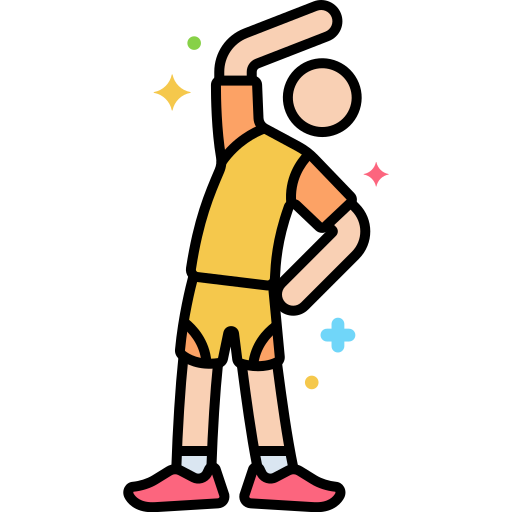

## Aufgabe: Eignungstestklassifikation - Mini-SVM
<div>
    <img src=attachment:e29f3314-9644-44dd-91cc-e54a5fb5749d.png width=100>
</div>

Stellen Sie sich vor Sie würden sich um Eignungstests an einer Hochschule kümmern. In diesen Tests wird festgestellt, ob sich Studierende für bestimmte Fächer qualifizieren. Sie sind schon länger damit betraut und empfinden diese Arbeit als eher mühsig. Daher möchten Sie ein Machine Learning Modell - eine SVM - trainieren, die Ihnen die Zuordnung von neuen Bewerbern automatisiert - und das auch noch als _One-Liner_. Nutzen Sie das Array `X_y`, in dem sich die Features und zugehörige Labels befinden, um mit dem vorhandenen Import in einer Zeile eine SVM zu instanziieren, zu trainieren und die Testergebnisse neuer Bewerber zu klassifizieren. Probieren Sie für Letzteres ein paar Feature-Vektoren aus (z.B. `[[3, 3, 6]]`). Können Sie diesen Ansatz sowohl mit, als auch ohne Grid-Search durchführen?
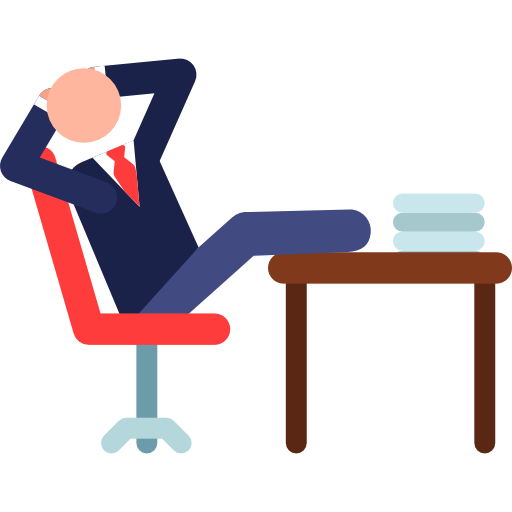

In [2]:
# Your data: student scores in (math, language, creativity) --> study field
X_y_train = np.array([
    [9, 5, 6, 'study field 1'],
    [10, 1, 2, 'study field 1'],
    [1, 8, 1, 'study field 2'],
    [4, 9, 3, 'study field 2'],
    [0, 1, 10, 'study field 3'],
    [5, 7, 9, 'study field 3'],
])

# One-liner (Sie dürfen nur in Zeile 12 Code schreiben)


### Lösung

In [2]:
# Your data: student scores in (math, language, creativity) --> study field
X_y_train = np.array([
    [9, 5, 6, 'study field 1'],
    [10, 1, 2, 'study field 1'],
    [1, 8, 1, 'study field 2'],
    [4, 9, 3, 'study field 2'],
    [0, 1, 10, 'study field 3'],
    [5, 7, 9, 'study field 3'],
])

# One-liner
SVC().fit(X_y_train[:, :-1], X_y_train[:, -1]).predict([[3, 3, 6]])

array(['study field 3'], dtype='<U21')

In [3]:
GridSearchCV(SVC(), {'C': [1, 2], 'gamma': [1, 2]}, cv=2).fit(X_y_train[:, :-1], X_y_train[:, -1]).best_estimator_.predict([[3, 3, 6]])

array(['study field 3'], dtype='<U21')

## Python "Schmankerl": SVM reversed

<div>
    <img src=attachment:7dde4643-2f12-4639-b383-830c8aaf1507.png width=200>
</div>

Lassen Sie uns wieder anders an die Sache herangehen: Ihnen liegen die Daten `Xtrain_1`, `ytrain_1` vor, an denen Sie eine SVM trainieren sollen. Nun sollen Sie aber keine Hyperparameteroptimierung durchführen, sondern den Datensatz anpassen \#wtf. Nutzen Sie einen `while`-Loop, um mittels `make_blobs(n_samples=100, centers=2, cluster_std=2.6)` einen zufällig generierten __Testdatensatz__ zu finden, bei dem Ihre trainierte SVM einen `accuracy_score` von über 0.8 aufweist. Visualisieren Sie dann die Blobs des passenden Testdatensatzes.
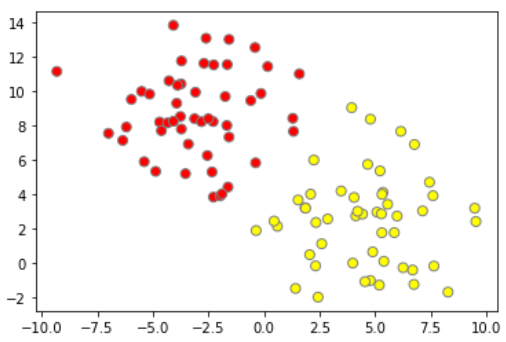

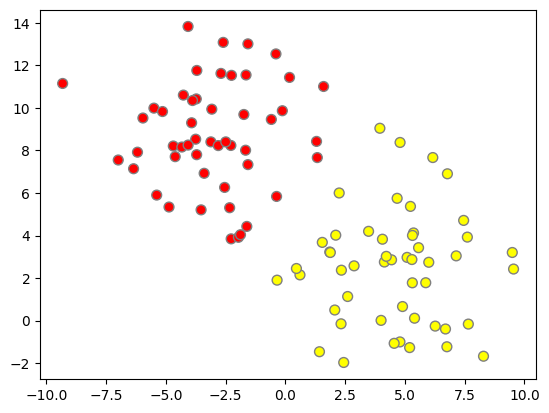

In [4]:
# Your data to train the model
Xtrain_1, ytrain_1 = make_blobs(n_samples=100, centers=2,
                  random_state=42,
                 cluster_std=2.6)

# Look
plt.scatter(Xtrain_1[:, 0], Xtrain_1[:, 1], c=ytrain_1, s=50, cmap='autumn', edgecolors='gray');

In [5]:
# Get model

# Train it

# Reversed SVM

# Look again


### Lösung

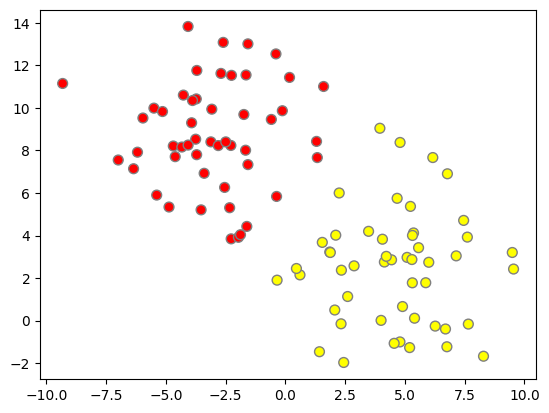

In [2]:
# Your data to train the model
Xtrain_1, ytrain_1 = make_blobs(n_samples=100, centers=2,
                  random_state=42,
                 cluster_std=2.6)

# Look
plt.scatter(Xtrain_1[:, 0], Xtrain_1[:, 1], c=ytrain_1, s=50, cmap='autumn', edgecolors='gray');

0.53
0.03
0.01
0.21
0.95


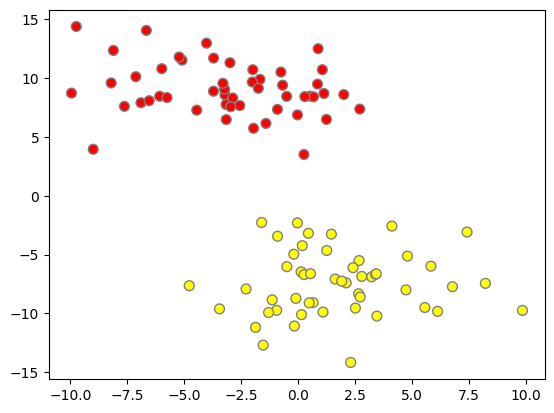

In [3]:
# Get model
model_1 = SVC()

# Train it
model_1.fit(Xtrain_1, ytrain_1)

# Reversed SVM
accuracy = 0
while accuracy <= .8:
    Xtest_1, ytest_1 = make_blobs(n_samples=100, centers=2, cluster_std=2.6)
    yfit = model_1.predict(Xtest_1)
    accuracy = accuracy_score(ytest_1, yfit)
    print(accuracy)
    
# Look again
plt.scatter(Xtest_1[:, 0], Xtest_1[:, 1], c=ytest_1, s=50, cmap='autumn', edgecolors='gray');

## Aufgabe: Digits Model mit Cross-Validation

<div>
    <img src=attachment:5c967b61-a343-4a89-81f0-8141aefe7289.png width=250>
</div>

In dieser Aufgabe wollen wir besser mit der `GridSearchCV`-Klasse vertraut werden. Im Beispiel "SVM zur Handschrifterkennung" haben wir den Digits-Datensatz verwendet, um SVMs einzuführen. In dieser Aufgabe wollen wir unseren Ansatz optimieren und anstatt eines Trainings direkt auf den Train-Test-Split einen Grid-Search durchführen. Passen Sie hierzu das Programm aus unserem Beispiel an, so dass Sie mittels `GridSearchCV` einen optimalen Parametersatz für eine SVM trainiert auf den Digits-Datensatz finden. Wie hoch ist die Klassifikationsgenauigkeit dieses optimalen Modells? Setzen Sie bei `GridSearchCV` die Eingabeargumente `verbose=1`, `n_jobs=-1`. Was bedeuten diese? Sind Sie für uns nützlich?
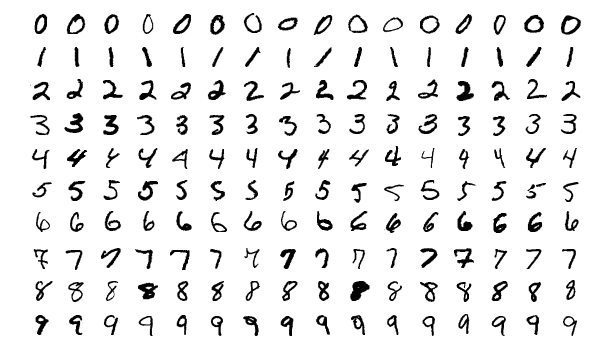

### Lösung

In [4]:
# Get digits data
X, y = load_digits(return_X_y=True)

# Do train test split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

# Get SVM instance: rbf kernel
model = SVC(kernel='rbf')

# Train SVM: grid search
param_grid = {'C': np.arange(1, 51, 5),
              'gamma': np.linspace(0.0001, 0.005, 10)
             }
grid = GridSearchCV(model, param_grid, verbose=1, n_jobs=-1)
grid.fit(Xtrain, ytrain)
print(grid.best_params_)

# Get best model
model = grid.best_estimator_

# Predict test data
yfit = model.predict(Xtest)

# Get accuracy
print(accuracy_score(ytest, yfit))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'C': np.int64(6), 'gamma': np.float64(0.001)}
0.9911111111111112


## Aufgabe: Extremely Damaged Bearings

<div>
    <img src=attachment:d171826b-520f-4118-8d78-42b6f59c06e0.png width=100>
</div>

Im Beispiel "Fault Classification of Bearing Faults" haben wir Fault Detection an Vibrationsdaten von Kugellagern durchgeführt. Wir sind mit wenig Tuning an beachtliche Genauigkeiten gekommen. In dieser Aufgabe liegen Ihnen nun nicht mehr nur 3 Schadensklassen und eine "Gesundklasse" vor, sondern zusätzlich zu Letzterer insgesamt 9 Schadensklassen (wenn Sie genauer auf den Dateinamen schauen, dann sehen Sie, dass es sich um unterschiedliche Schadensausprägungen handelt). Ihr Ziel in dieser Aufgabe ist es auch hier eine SVM zu trainieren. Gehen Sie hierzu schrittweise vor:
* Copy&Paste Code aus unserem Beispiel
* Trainieren Sie das Modell aus unserem Beispiel an den neuen Klassen. Auf welche Genauigkeit kommen Sie ohne Veränderung des weiteren Codes?
* Sie sehen, dass unsere Genauigkeit stark sinkt - wir müssen uns also etwas überlegen. Versuchen Sie die Ranges der Hyperparameter zu variieren. Welche Steigerung in der Genauigkeit erhalten Sie hierdurch?
* Könnten Sie danach evtl. durch Hinzufügen neuer Features die Genauigkeit weiter steigern?
* Führen Sie für die Anzahl an Klassen, Anzahl an Features, etc. Variablen ein und passen Sie den Code des Beispiels so an, dass Sie nicht an jeder Stelle Änderungen durchführen müssen, wenn Sie diese Zahlen variieren.
* Im letzten Schritt variieren Sie die Anzahl an Splits mittels eines `for`-Loops. Wo im Code muss dieser platziert werden?

Schaffen Sie 95% Genauigkeit? :)
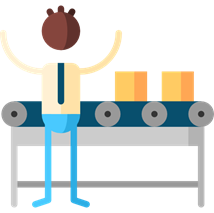

### Lösung

In [9]:
# Get list of files
files = glob.glob('./../res/data/bearing/*')

# Configuration
num_features = 5
num_classes = 10

# Stack time series
time_series_array = np.zeros((100000, num_classes))
for i, file_path in enumerate(files):
    time_series_array[:, i] = np.load(file_path).reshape(-1,)

# Calculate features for each split
for num_splits in [50, 100, 150, 200]:
    
    # Get splits
    split_array = np.array_split(time_series_array, num_splits)
    
    # Features
    features_array = np.zeros((num_splits, num_classes, num_features))
    for n_split, split in enumerate(split_array):

        # Std
        features_array[n_split, :, 0] = split.std(axis=0)

        # Skewness
        features_array[n_split, :, 1] = skew(split)

        # Kurtosis
        features_array[n_split, :, 2] = kurtosis(split)

        # Maximum
        features_array[n_split, :, 3] = np.max(split, axis=0)

        # Median
        features_array[n_split, :, 4] = np.median(split, axis=0)

    # Reshape
    features_array = features_array.reshape(num_splits * num_classes, num_features)
    y = np.array(list(range(num_classes)) * num_splits)

    # Train test split
    Xtrain_2, Xtest_2, ytrain_2, ytest_2 = train_test_split(features_array, y)

    # Train SVM by GridSearchCV
    model_2 = SVC(kernel='rbf', class_weight='balanced')
    param_grid = {'C': np.arange(1, 501, 10),
                  'gamma': np.linspace(0.0001, 0.005, 10)}
    grid = GridSearchCV(model_2, param_grid, n_jobs=-1)
    grid.fit(Xtrain_2, ytrain_2)
    print(grid.best_params_)

    # Get the best model and predict the test data set
    model_2 = grid.best_estimator_
    yfit = model_2.predict(Xtest_2)

    # Get accuracy
    print(accuracy_score(ytest_2, yfit))
    print(f'Number of splits: {num_splits}')

{'C': np.int64(481), 'gamma': np.float64(0.005)}
0.944
Number of splits: 50
{'C': np.int64(491), 'gamma': np.float64(0.005)}
0.92
Number of splits: 100
{'C': np.int64(491), 'gamma': np.float64(0.005)}
0.88
Number of splits: 150
{'C': np.int64(401), 'gamma': np.float64(0.0044555555555555555)}
0.872
Number of splits: 200


In [10]:
# Save
import joblib
np.save('C:/Users/gom39655/LRZ Sync+Share/code/git/teaching/lectures/wise_2021_22/predictive-maintenance/notebooks/examples/evaluation-confusion-matrix-roc/data/bearing_10classes_ytest.npy', ytest_2)
np.save('C:/Users/gom39655/LRZ Sync+Share/code/git/teaching/lectures/wise_2021_22/predictive-maintenance/notebooks/examples/evaluation-confusion-matrix-roc/data/bearing_10classes_ypredicted.npy', yfit)

## Bonus-Aufgabe: Decision Boundaries einer SVM bei Toy und Bearing Fault Daten

<div>
    <img src=attachment:fb7de61f-5b4a-4f9e-b737-38d2c7f3628d.png width=200>
</div>

Die `sklearn`-Docs sind sehr lehrreich und detailliert - sowohl bzgl. Code-Beispielen, als auch der zugrundeliegenden Theorie. In dieser Aufgabe schauen Sie sich bitte den Abschnitt "Classifier Comparison" hier (https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) an. Sie werden sehen, dass man für alle möglichen Klassifikatoren nicht nur Entscheidungsgrenzen, sondern _Entscheidungsflächen_ erzeugen kann. Wir nutzen zwei trainierte Modelle von oben (wie speichert man ML-Modelle mittels `sklearn`?), um solche Flächen zu visualisieren:

1. Versuchen Sie zuerst das Model aus Aufgabe 'Python "Schmankerl": SVM reversed' zu nutzen, um solche Entscheidungsflächen zu erzeugen. Passen Sie hierzu den Code aus dem `sklearn`-Manual an.

1. Erweitern Sie nun das Ganze auf unsere Daten aus der Aufgabe "Extremely Damaged Bearings". Nutzen Sie einen der dort trainierten Klassifikatoren, um Entscheidungsflächen zu generieren. Sie stoßen auf ein Problem: wir haben ja mehr als drei Dimensionen. :)
\#stackoverflow (https://stackoverflow.com/questions/37718347/plotting-decision-boundary-for-high-dimension-data). Auch das hier https://github.com/tmadl/highdimensional-decision-boundary-plot scheint interessant zu sein.
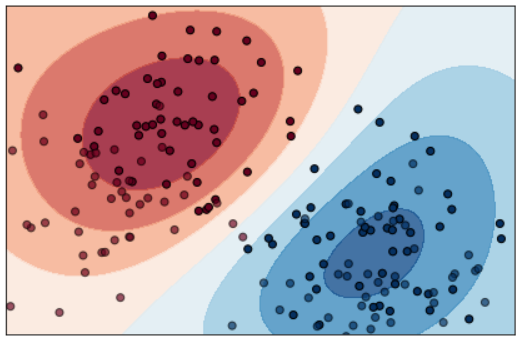

### Lösung

In [6]:
xx

array([[-9.82053489, -9.80053489, -9.78053489, ...,  9.99946511,
        10.01946511, 10.03946511],
       [-9.82053489, -9.80053489, -9.78053489, ...,  9.99946511,
        10.01946511, 10.03946511],
       [-9.82053489, -9.80053489, -9.78053489, ...,  9.99946511,
        10.01946511, 10.03946511],
       ...,
       [-9.82053489, -9.80053489, -9.78053489, ...,  9.99946511,
        10.01946511, 10.03946511],
       [-9.82053489, -9.80053489, -9.78053489, ...,  9.99946511,
        10.01946511, 10.03946511],
       [-9.82053489, -9.80053489, -9.78053489, ...,  9.99946511,
        10.01946511, 10.03946511]], shape=(840, 994))

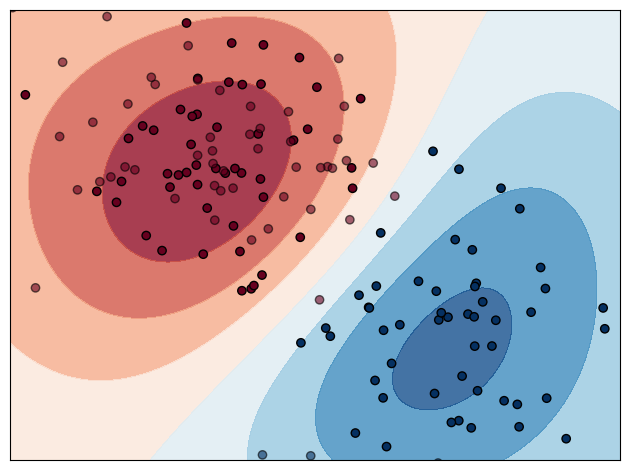

In [5]:
# Mesh
h = .02
x_min, x_max = Xtrain_1[:, 0].min() - .5, Xtrain_1[:, 0].max() + .5
y_min, y_max = Xtrain_1[:, 1].min() - .5, Xtrain_1[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                 np.arange(y_min, y_max, h))

# Plot data
figure = plt.figure()
ax = plt.subplot(1, 1, 1)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = model_1.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap='RdBu', alpha=.8)

# Plot the training points
ax.scatter(Xtrain_1[:, 0], Xtrain_1[:, 1], c=ytrain_1, cmap='RdBu',
           edgecolors='k')

# Plot the testing points
ax.scatter(Xtest_1[:, 0], Xtest_1[:, 1], c=ytest_1, cmap='RdBu',
           edgecolors='k', alpha=0.6)

# Settings
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
plt.tight_layout()
plt.show()

In [14]:
import numpy as np, matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE

# replace the below by your data and model
X_Train_embedded = TSNE(n_components=2).fit_transform(Xtrain_2)
y_predicted = model_2.predict(Xtrain_2)

# create meshgrid
resolution = 100 # 100x100 background pixels
X2d_xmin, X2d_xmax = np.min(X_Train_embedded[:,0]), np.max(X_Train_embedded[:,0])
X2d_ymin, X2d_ymax = np.min(X_Train_embedded[:,1]), np.max(X_Train_embedded[:,1])
xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

# approximate Voronoi tesselation on resolution x resolution grid using 1-NN
background_model = KNeighborsClassifier(n_neighbors=1).fit(X_Train_embedded, y_predicted) 
voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
voronoiBackground = voronoiBackground.reshape((resolution, resolution))

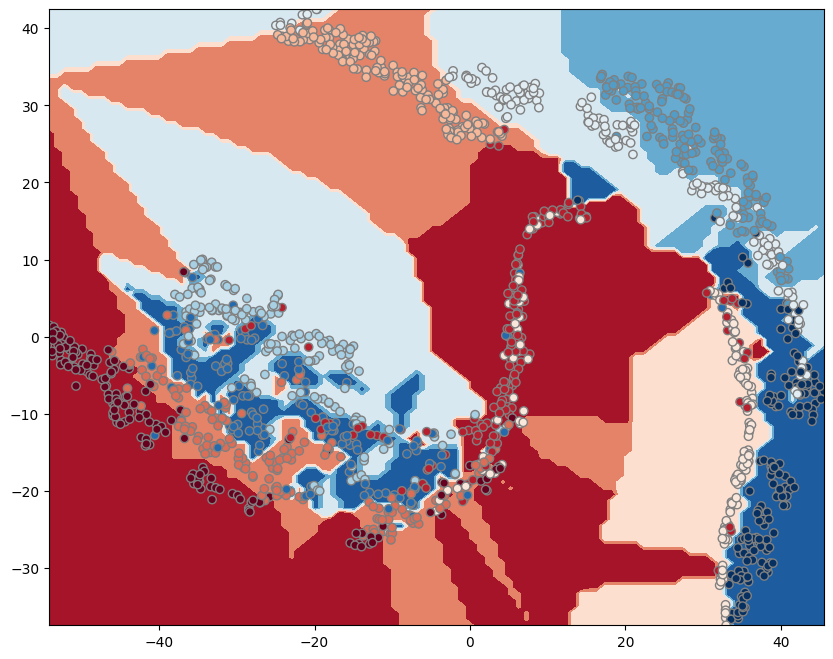

In [15]:
#plot
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, voronoiBackground, cmap='RdBu')
plt.scatter(X_Train_embedded[:,0], X_Train_embedded[:,1], c=ytrain_2, edgecolors='gray', cmap='RdBu')
plt.show()

# Quellen
<div>Icons made by <a href="https://www.freepik.com" title="Freepik">Freepik</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a></div>

<div>
    <img src=attachment:6be9813b-ed7f-44ce-856c-0d03f9209558.png width=250>
</div>
By Josef Steppan - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=64810040

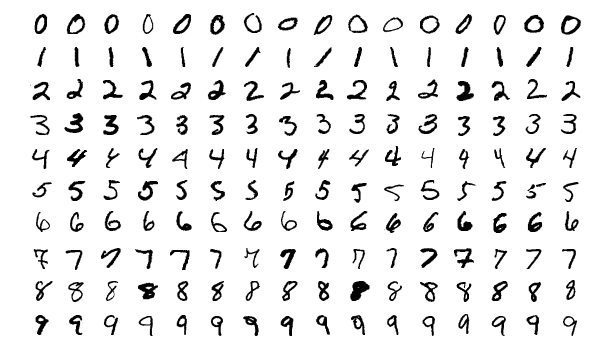

<div>
    <img src=attachment:7ac75623-172d-4d2d-8e47-382d3f0fc775.png width=100>
</div>
<div>Icons made by <a href="https://www.flaticon.com/authors/flat-icons" title="Flat Icons">Flat Icons</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a></div>
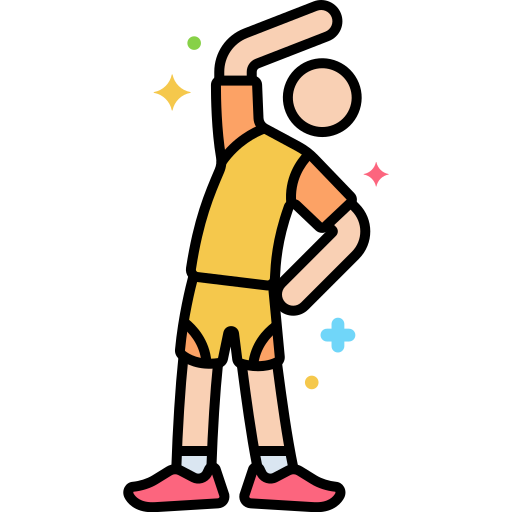

<div>
    <img src=attachment:0857490e-7c5f-43e8-99ed-804f9bd0d479.png width=100>
</div>
<div>Icons made by <a href="https://www.freepik.com" title="Freepik">Freepik</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a></div>
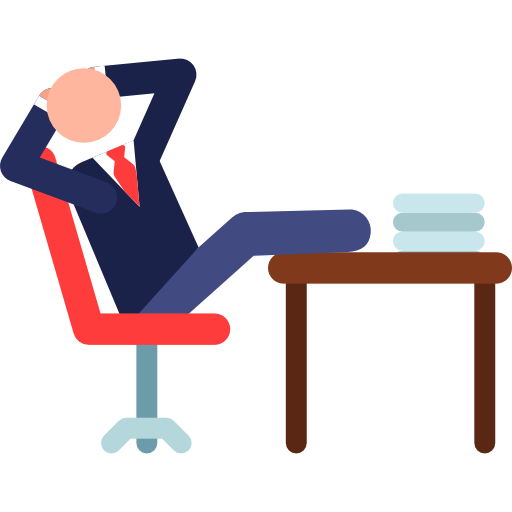

# Backup

## Aufgabe spezifisch: SVM aus Paper
Lesen Sie das Paper __"Jan, S. U., Lee, Y. D., Shin, J., & Koo, I. (2017). Sensor fault classification based on support vector machine and statistical time-domain features. IEEE Access, 5, 8682-8690."__ (https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=7932066) und setzen Sie folgende Teile um.

## Aufgabe generisch: SVM und Validierungskurven kombinieren